In [2]:
library(rethinking)

In [3]:
data(reedfrogs)
d <- reedfrogs
str(d)

'data.frame':	48 obs. of  5 variables:
 $ density : int  10 10 10 10 10 10 10 10 10 10 ...
 $ pred    : Factor w/ 2 levels "no","pred": 1 1 1 1 1 1 1 1 2 2 ...
 $ size    : Factor w/ 2 levels "big","small": 1 1 1 1 2 2 2 2 1 1 ...
 $ surv    : int  9 10 7 10 9 9 10 9 4 9 ...
 $ propsurv: num  0.9 1 0.7 1 0.9 0.9 1 0.9 0.4 0.9 ...


In [4]:
d$tank <- 1:nrow(d)

In [5]:
dat <- list(
    S=d$surv,
    N=d$density,
    tank=d$tank
    )

#### model with fixed intercepts

In [6]:
m13.1 <- ulam(
    alist(
        S ~ dbinom(N, p),
        logit(p) <- a[tank],
        a[tank] ~ dnorm(0, 1.5)
    ), data=dat, chains=4, log_lik=TRUE
)


SAMPLING FOR MODEL '3599d1bd9063241173f448edc67fa436' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.73 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.109382 seconds (Warm-up)
Chain 1:                0.092216 seconds (Sampling)
Chain 1:   

In [7]:
precis(m13.1, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],1.69702247,0.7582414,0.56199509,2.93057645,6039.832,0.9989772
a[2],2.41773201,0.8989122,1.06909566,3.90553177,6433.027,0.9985144
a[3],0.75711122,0.6325526,-0.24010820,1.75662072,4423.227,0.9986035
a[4],2.40606681,0.8576347,1.15654481,3.90120052,3470.570,0.9999201
a[5],1.74297251,0.7854351,0.57521255,3.01972843,3500.744,0.9986178
a[6],1.70138692,0.7715375,0.57950545,2.97146168,6602.060,0.9985288
a[7],2.38690954,0.8739243,1.08347540,3.89484877,5613.774,0.9992576
a[8],1.70242265,0.7499300,0.59291535,2.93620105,3735.581,0.9984421
a[9],-0.36847812,0.6127529,-1.36345929,0.60286296,5226.158,0.9982231


#### multilevel model

In [8]:
m13.2 <- ulam(
    alist(
        S ~ dbinom(N, p),
        logit(p) <- a[tank],
        a[tank] ~ dnorm(a_bar, sigma),
        a_bar ~ dnorm(0, 1.5),
        sigma ~ dexp(1)
    ), data=dat, chains=4, log_lik=TRUE
)


SAMPLING FOR MODEL '71890fa4702bb6983de3ea7367f0b982' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.171288 seconds (Warm-up)
Chain 1:                0.090154 seconds (Sampling)
Chain 1:   

In [15]:
round(compare(m13.1, m13.2),2)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m13.2,199.20,7.10,0.00,NA,20.62,1
m13.1,213.87,4.59,14.67,3.61,25.25,0


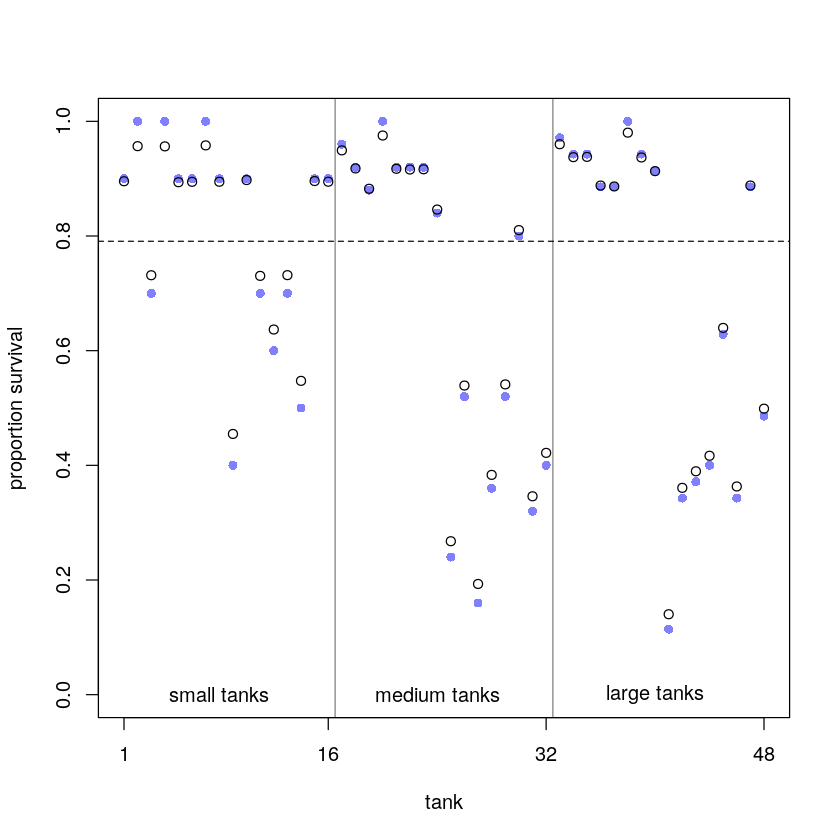

In [10]:
post <- extract.samples(m13.2)
d$propsurv.est <- logistic(apply(post$a, 2, mean))
plot(d$propsurv, ylim=c(0,1), pch=16, xaxt="n", xlab="tank", ylab="proportion survival", col=rangi2)
axis(1, at=c(1,16,32,48), labels=c(1,16,32,48))

points(d$propsurv.est)

abline(h=mean(inv_logit(post$a_bar)), lty=2)

abline(v=16.5, lwd=0.5)
abline(v=32.5, lwd=0.5)
text(8, 0, "small tanks")
text(16+8,0, "medium tanks")
text(32+8, 0, "large tanks")

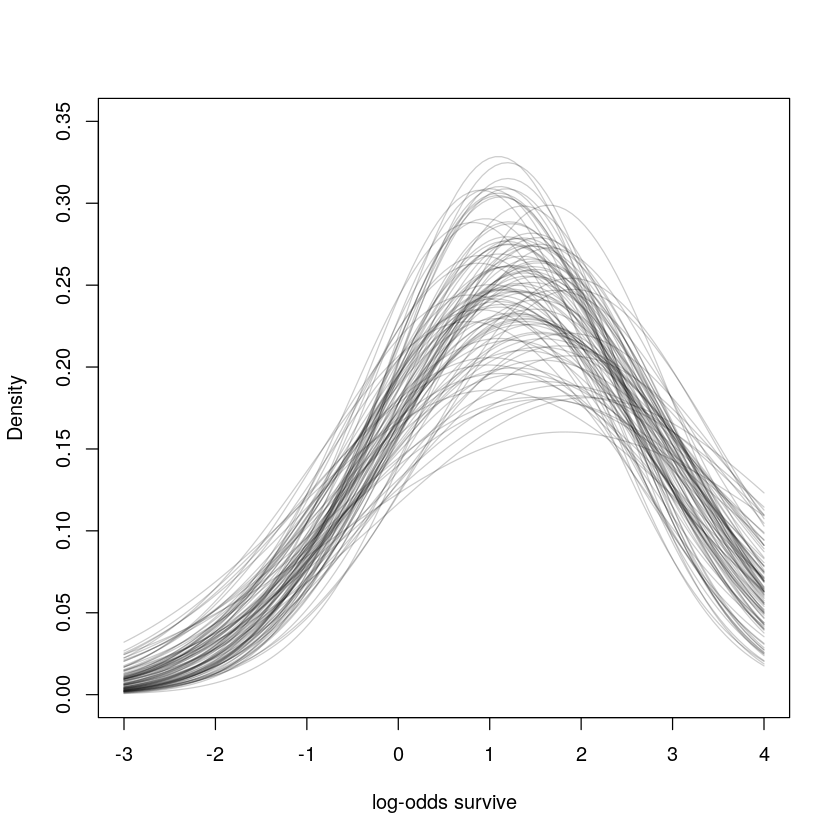

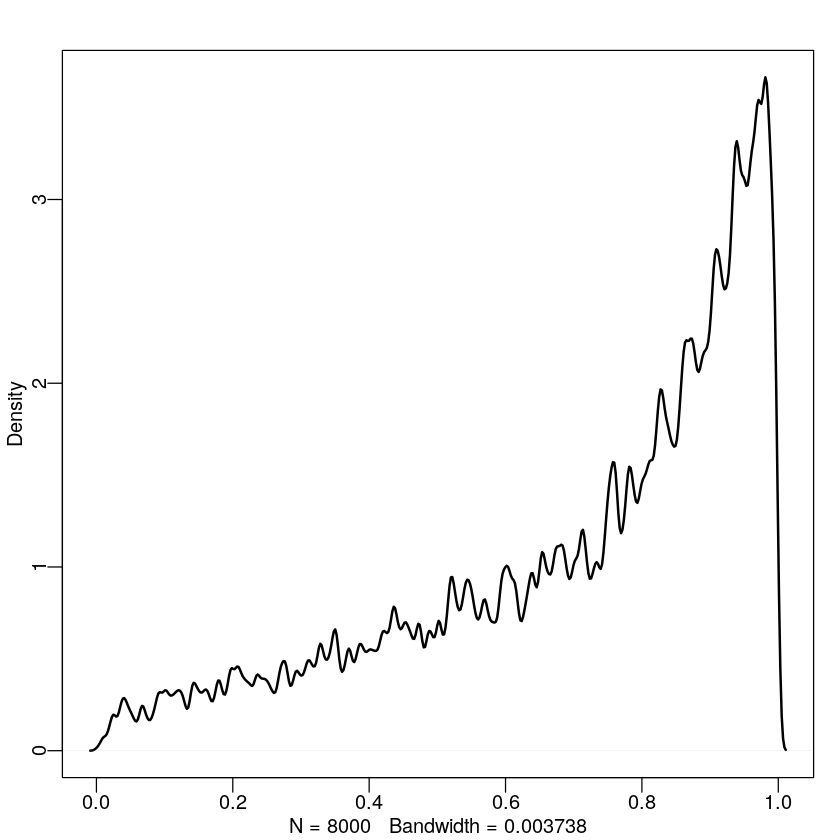

In [11]:
plot(NULL, xlim=c(-3, 4), ylim=c(0, 0.35), xlab="log-odds survive", ylab="Density")
for(i in 1:100)
    curve(dnorm(x, post$a_bar[i], post$sigma[i]), add=TRUE, col=col.alpha("black", 0.2))

sim_tanks <- rnorm(8000, post$a_bar, post$sigma)
dens(inv_logit(sim_tanks), lwd=2, adj=0.1)

## simulating data

In [12]:
a_bar <- 1.5 # avg log-odds in population of ponds
sigma <- 1.5 # standard deviation of the distribution of log-odds
nponds <- 60 # no of ponds
Ni <- as.integer(rep(c(5,10,25,35), each=15)) # initial count of tadpoles per pond

#### simulating survival counts per pond

In [13]:
set.seed(5005)
a_pond <- rnorm(nponds, mean=a_bar, sd=sigma) # log-odds of survival per pond

In [14]:
dsim <- data.frame(pond=1:nponds, Ni=Ni, true_a=a_pond)

In [17]:
head(dsim)

,pond,Ni,true_a
,<int>,<int>,<dbl>
1,1,5,0.5667312
2,2,5,1.9900232
3,3,5,-0.1377569
4,4,5,1.8567665
5,5,5,3.9120880
6,6,5,1.9541487


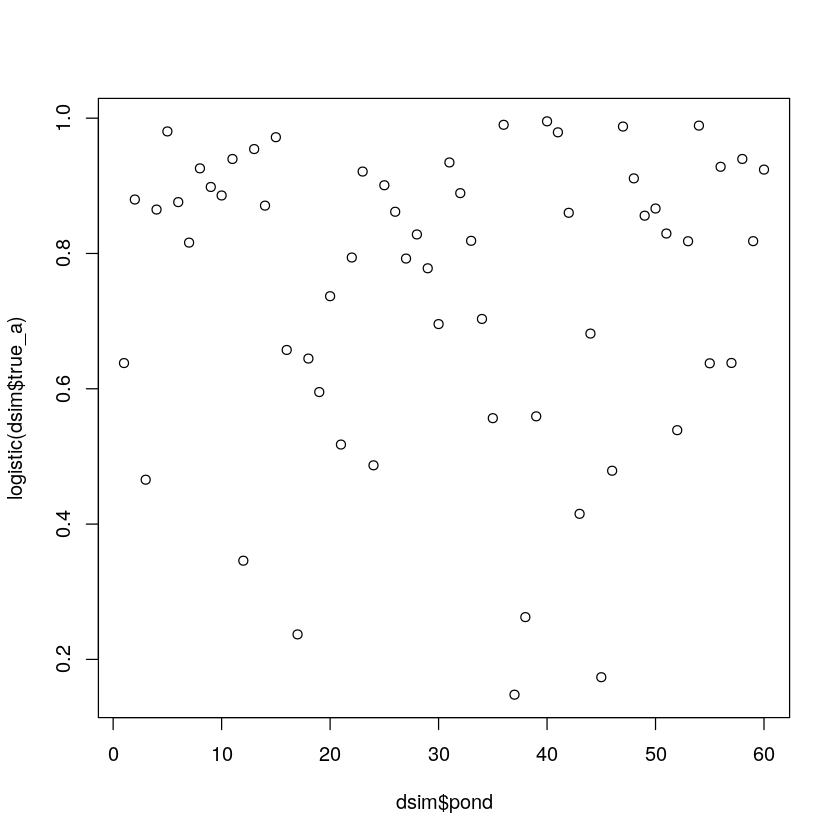

In [21]:
plot(dsim$pond, logistic(dsim$true_a))

#### simulating survival count per pond

In [25]:
dsim$Si <- rbinom(nponds, prob=logistic(dsim$true_a), size=dsim$Ni)

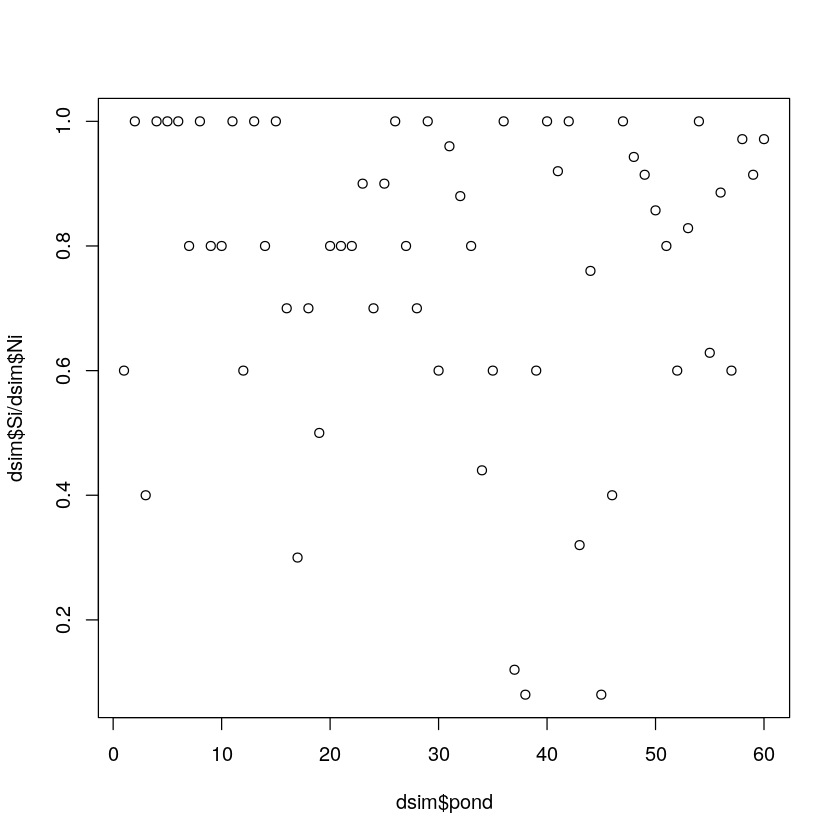

In [27]:
plot(dsim$pond, dsim$Si/dsim$Ni)

## estimating the data

##### complete pooling
Estimating a model with a dummy variable per pond would return the empirical proportion of survivors in each pond. This approach overfits badly.

In [28]:
dsim$p_nopool <- dsim$Si/dsim$Ni

##### partial pooling
Partial pooling shares information across ponds through assuming a common probability of survival for all ponds `a_bar` but allows the individual ponds to deviate from `a_bar`.

In [30]:
dat <- list(Si=dsim$Si, Ni=dsim$Ni, pond=dsim$pond)
m13.3 <- ulam(
    alist(
        Si ~ dbinom(Ni, p),
        logit(p) <- a_pond[pond],
        a_pond[pond] ~ dnorm(a_bar, sigma),
        a_bar ~ dnorm(0, 1.5),
        sigma ~ dexp(1)
    ), data=dat, chains=4
)


SAMPLING FOR MODEL 'd8ab7f3d807d0eb7d841894a7fbd4a24' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000224 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.24 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.150228 seconds (Warm-up)
Chain 1:                0.097812 seconds (Sampling)
Chain 1:  

In [32]:
post <- extract.samples(m13.3)
dsim$p_partpool <- apply(inv_logit(post$a_pond), 2, mean)

In [33]:
dsim$p_true <- inv_logit(dsim$true_a)

In [47]:
nopool_error <- abs(dsim$p_nopool - dsim$p_true)
partpool_error <- abs(dsim$p_partpool - dsim$p_true)

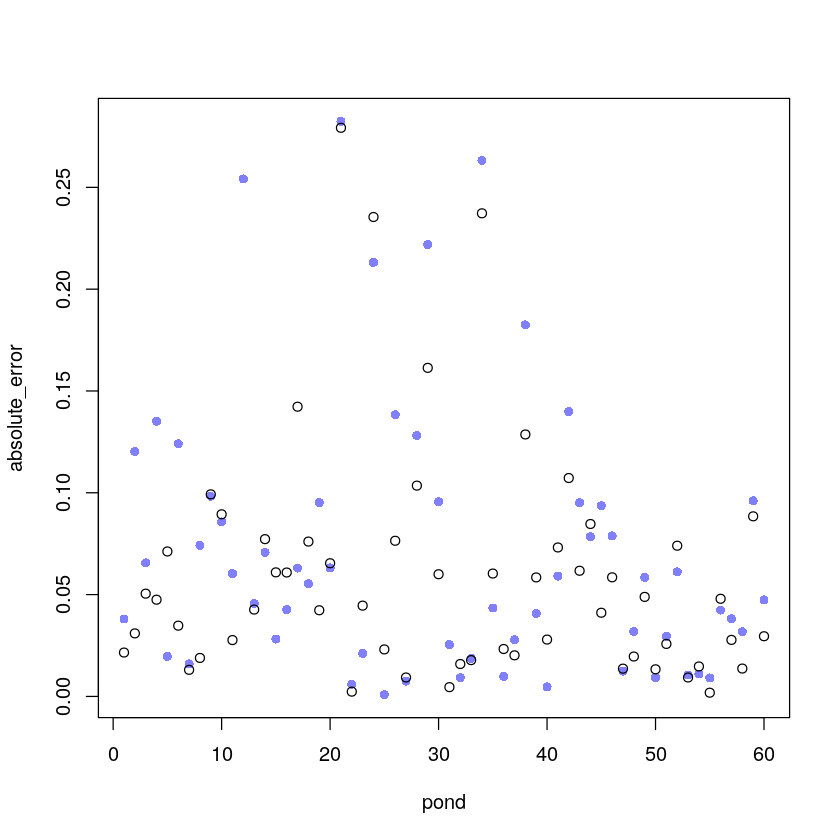

In [48]:
plot(1:60, nopool_error, xlab="pond", ylab="absolute_error", col=rangi2, pch=16)
points(1:60, partpool_error)

In [49]:
logit(0)

[1] -Inf